# Frame the problem: Given the features of a flower, can we predict the species of the flower?

## Install and Load the libraries

In [1]:
"""
!pip install pydotplus
!pip install numpy
!pip install ipython
!pip install sklearn
!pip install matplotlib
!pip install seaborn
"""

'\n!pip install pydotplus\n!pip install numpy\n!pip install ipython\n!pip install sklearn\n!pip install matplotlib\n!pip install seaborn\n'

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from IPython.display import Image  
import pydotplus
import numpy as np
import seaborn as sns
import pandas as pd

## Collect/load the data

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

## Conduct Exploratory Data Analysis

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


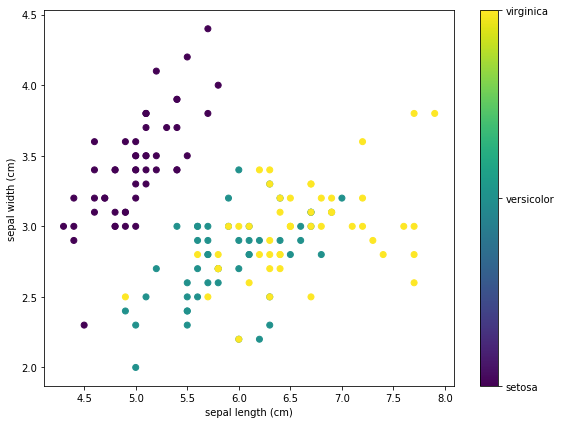

In [7]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])

plt.tight_layout()
plt.show()

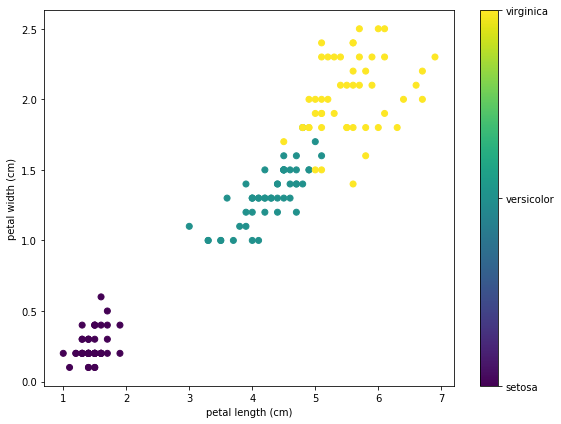

In [8]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8,6))
plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])

plt.tight_layout()
plt.show()

## Prepare the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.5, random_state=42)

## Build and Evaluate the model

In [10]:
forrest_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42)

forrest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
y_pred = forrest_clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Out-of-bag score estimate: {forrest_clf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.907
Mean accuracy score: 0.987


In [13]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,29,0,0
versicolor,0,23,0
virginica,0,1,22


In [14]:
for name, score in zip(iris["feature_names"], forrest_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11154952501633716
sepal width (cm) 0.04713895682401728
petal length (cm) 0.4478492880674621
petal width (cm) 0.39346223009218345
